## Projet de classification, survivant du Titanic:

In [11]:
import pandas as pd
import seaborn as sns

Import du Dataset depuis le jeux de données Seaborn :

In [12]:
titanic  = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head(5)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Nettoyage et filtrage du Dataset 

dropna est une méthode pandas utilisée pour supprimer les lignes ou les colonnes contenant des valeurs manquantes (NaN).

axis=0 indique que vous souhaitez supprimer des lignes. En d'autres termes, vous allez parcourir le DataFrame et supprimer toutes les lignes qui contiennent au moins une valeur manquante.

inplace=True signifie que vous souhaitez effectuer cette opération de suppression directement sur le DataFrame titanic plutôt que de renvoyer une copie du DataFrame modifié. Cela modifie le DataFrame titanic lui-même.

In [14]:
titanic = titanic.loc[:,[ 'survived', 'pclass', 'sex', 'age' ]]  # ou # titanic = titanic[ 'survived', 'pclass', 'sex', 'age' ]] plus raccourcis
print(titanic.head(3),'\n')
titanic.dropna(axis =0 ,inplace =True)
titanic['sex'].replace(['male', 'female'],[0, 1],inplace = True)
print("Dataset modifié :\n",titanic.head(3))


   survived  pclass     sex   age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0 

Dataset modifié :
    survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0


On importe un estimateur en regardant la carte d'algorithmes de sckit Learn : KN neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from warnings import filterwarnings

le modele doit être entrainé sur des données de type (x,y) on va subdiviser le tableau en 2 tableaux: **(features=reste du taleau, target=survived)** :

L'hyperparamètre n_neighbors dans le modèle KNeighborsClassifier (k-plus proches voisins) détermine le nombre de voisins les plus proches à considérer lors de la classification d'un nouvel échantillon. Cet hyperparamètre influence la façon dont le modèle prend des décisions sur les étiquettes de classe.

In [ ]:
filterwarnings("ignore")
# on instantie la classe du modele :
model = KNeighborsClassifier(n_neighbors=5) # ajustement de l'hypermparamètre
y = titanic['survived'] # on garde un tableau contenant les donées de la colonne 'survived'
X = titanic.drop('survived', axis =1) # dans la methode drop, on doit toujours preciser l'axis du drop (suppression), là on supprime la colonne 'survived'
print(y.head(3))
print(X.head(3))

0    0
1    1
2    1
Name: survived, dtype: int64
   pclass  sex   age
0       3    0  22.0
1       1    1  38.0
2       3    1  26.0


## Entrainement du modèle :

In [ ]:
model.fit(X,y) # Fit the k-nearest neighbors classifier from the training datase
print(model.score(X,y)) # Return the mean accuracy on the given test data and labels.
model.predict(X).reshape(len(y),1)[:10]

0.8417366946778712


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

### Définition d'une fonction ayant pour but de prédire la survie du passager : 

Il faut que notre fonction return quelque chose ressemblant à notre feature X donc il faut définir des paramètre 'pclass' 'sex' 'age'  :

In [ ]:
def survie (model, pclass = 3, sex = 1, age = 28 ):
    X = np.array([pclass, sex, age]).reshape(1,3)
    return print("survie = ",model.predict(X),"  ","probabilité de survie =",model.predict_proba(X))

In [ ]:
survie(model,2,0,28)

survie =  [0]    probabilité de survie = [[0.8 0.2]]


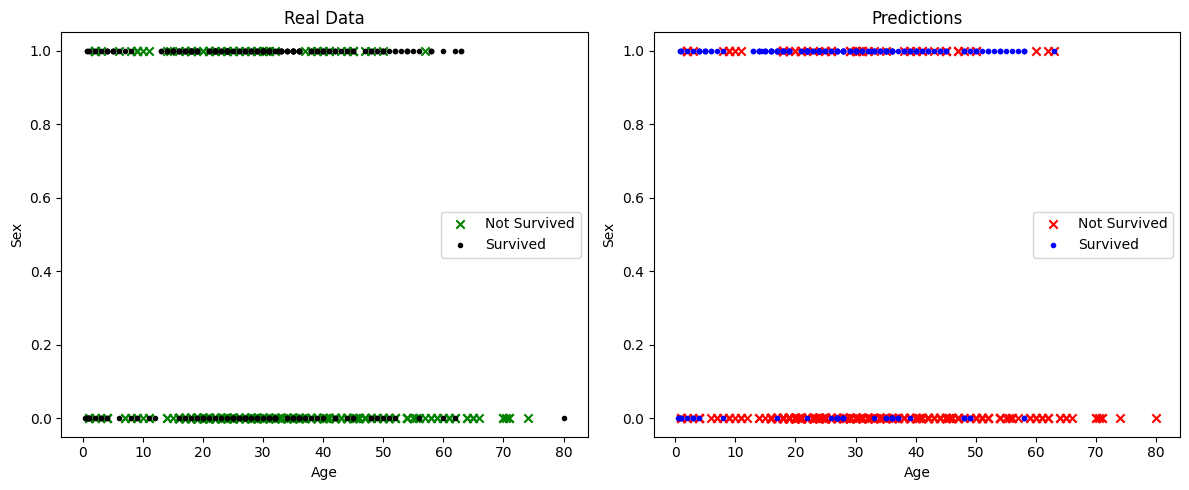

In [20]:
import matplotlib.pyplot as plt

# Données réelles
  # Vos données d'entrée réelles (pclass, sex, age)
y_real = y  # Vos étiquettes réelles (survived)

# Prédictions
 # Les mêmes données d'entrée pour les prédictions
y_predictions = model.predict(X)  # Prédictions du modèle

# Créez une figure avec deux sous-plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Sous-plot 1 : Données réelles
ax1.scatter(X[y_real == 0]['age'], X[y_real == 0]['sex'], c='green', label='Not Survived', marker='x')
ax1.scatter(X[y_real == 1]['age'], X[y_real == 1]['sex'], c='black', label='Survived', marker='.')
ax1.set_xlabel('Age')
ax1.set_ylabel('Sex')
ax1.set_title('Real Data')
ax1.legend()

# Sous-plot 2 : Prédictions
ax2.scatter(X[y_predictions == 0]['age'], X[y_predictions == 0]['sex'], c='red', label='Not Survived', marker='x')
ax2.scatter(X[y_predictions == 1]['age'], X[y_predictions == 1]['sex'], c='blue', label='Survived', marker='.')
ax2.set_xlabel('Age')
ax2.set_ylabel('Sex')
ax2.set_title('Predictions')
ax2.legend()

plt.tight_layout()
plt.show()
